# Avacado Project

The avocado, a tree likely originating from southcentral Mexico, is classified as a member of the flowering plant family Lauraceae. The fruit of the plant, also called an avocado, is botanically a large berry containing a single large seed.

This data was downloaded from the Hass Avocado Board website in May of 2018.The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. 

My task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)    


In [4]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [5]:
#checking the data dimensions
df.shape

(1517, 13)

In [6]:
#checking the columns in the dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
#checking the datatypes of each column
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

>we can see through above observation that this dataset has 'object', 'float', 'int' columns.

In [8]:
#checking the null values in each column of the dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

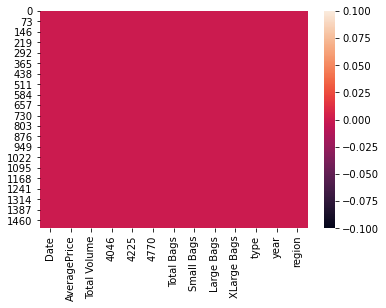

In [9]:
sns.heatmap(df.isnull())

>As we can see through the above 2 observations there are no null values present in the dataset

In [10]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [11]:
#checking the information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 136.4+ KB


In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


### Visualization of the data

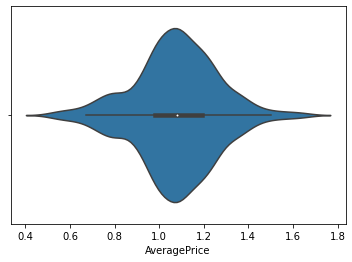

In [13]:
sns.violinplot(x= "AveragePrice", data=df)
plt.show()

>As we see through above distribution the average price of the avacado's are in a range of 0.4 to 1.8

>The majority of the the price is from 1.0 to 1.2

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

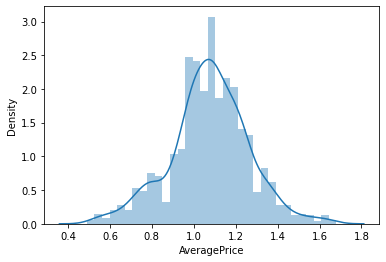

In [14]:
sns.distplot(df["AveragePrice"])

Text(0.5, 1.0, 'Total Volume')

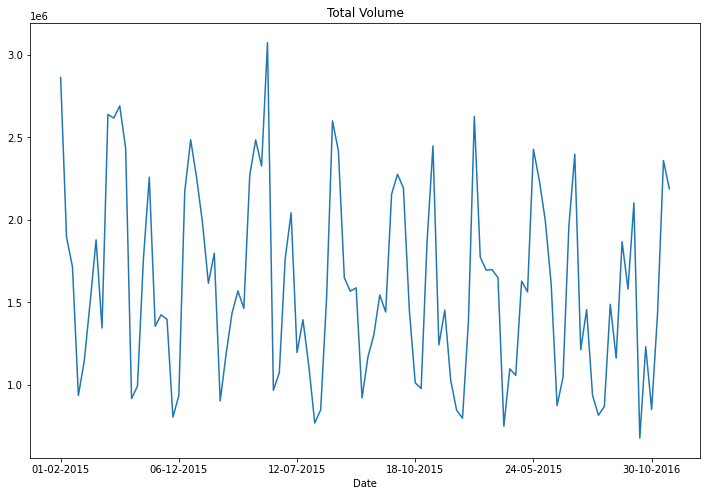

In [15]:
a=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
a['Total Volume'].plot()
plt.title('Total Volume')

>As we see through above graph the sale of the avacado is varying very much.

> the maximum sale of the avacado is done somewhere in june.

Text(0.5, 1.0, '4046 sale')

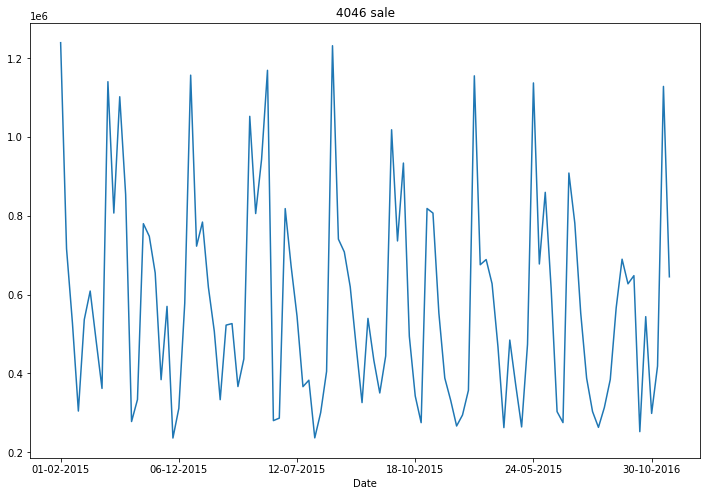

In [16]:
a=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
a['4046'].plot()
plt.title('4046 sale')

>We can observe from the above graph that the sale of the '4046' type of avacado is highest in feburary and in august.

Text(0.5, 1.0, '4225 sale')

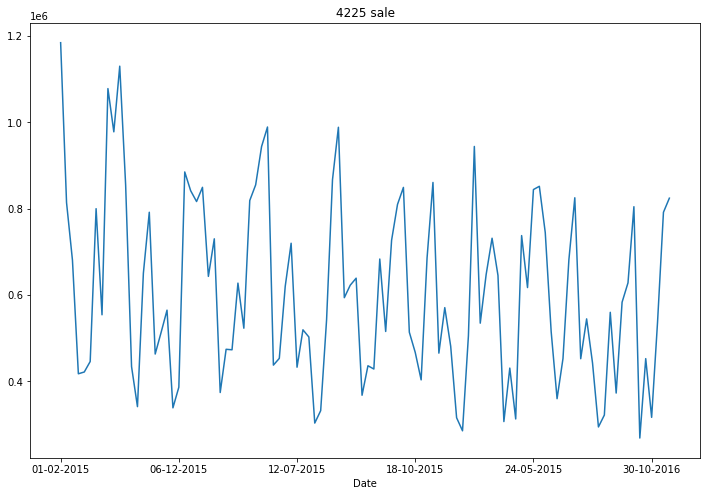

In [17]:
a=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
a['4225'].plot()
plt.title('4225 sale')

>We can onserve from the above graph that the sale of '4225' type of avacado is high in february and after that it is decreasing.

Text(0.5, 1.0, '4770 sale')

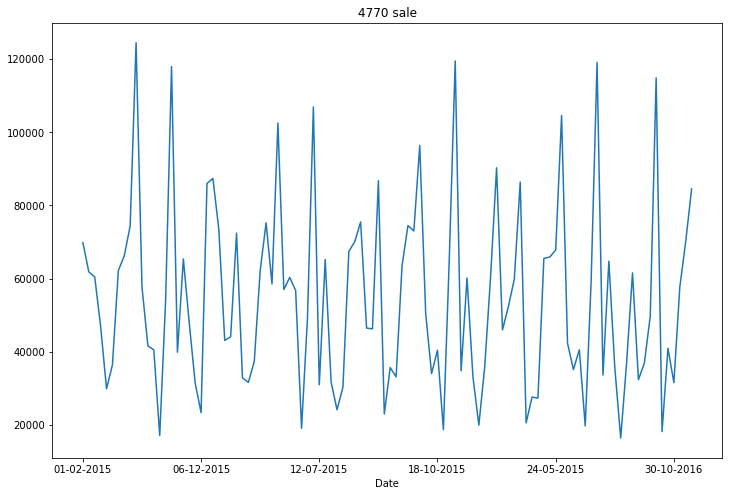

In [18]:
a=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
a['4770'].plot()
plt.title('4770 sale')

>We can observe from the above graph that the sale of '4770' type of avacado is less in february but it increase suddenly in somewhere middle of the 2015 year and then it decreases.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'DallasFtWorth'),
  Text(11, 0, 'Denver'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'GrandRapids'),
  Text(14, 0, 'GreatLakes'),
  Text(15, 0, 'HarrisburgScranton'),
  Text(16, 0, 'HartfordSpringfield'),
  Text(17, 0, 'Houston'),
  Text(18, 0, 'Indianapolis'),
  Text(19, 0, 'Jacksonville'),
  Text(20, 0, 'LasVegas'),
  Text(21, 0, 'LosAngeles'),
  Text(22, 0, 'Louisville'),
  Text(23, 0, 'MiamiFtLauderdale'),
  Text(24, 0, 'Midsouth'),
  Text(25, 0, 'Nashville'),
  Text(26, 0, 'N

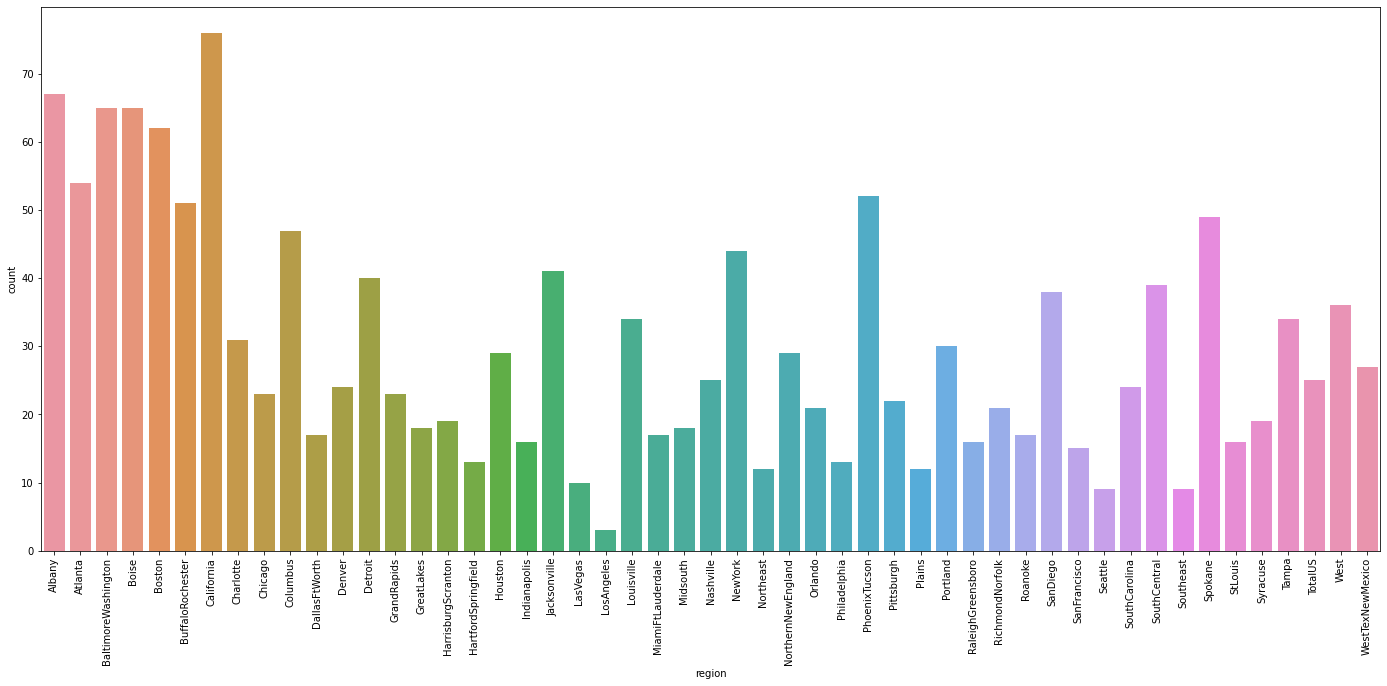

In [19]:
plt.figure(figsize=(24,10))
sns.countplot(df['region']) 
plt.xticks(rotation=90)

In [20]:
df_region= df.region.value_counts()
df_region

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

>From the above 2 observation we can see that 'California' has the highest use of avacado and 'Los Angeles' has the least use of avacado.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

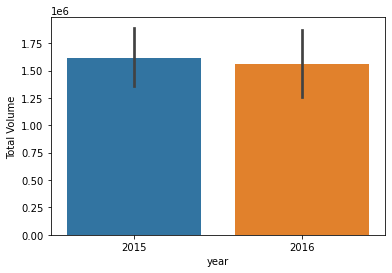

In [21]:
sns.barplot(x='year', y='Total Volume', data=df)

>Ae we see through the above graph the sale of avacado in 2015 is little more then in 2016.

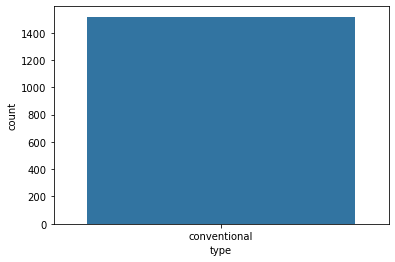

In [22]:
sns.countplot(x='type',data=df)
plt.show()

Text(0.5, 1.0, 'XLarge bags sale')

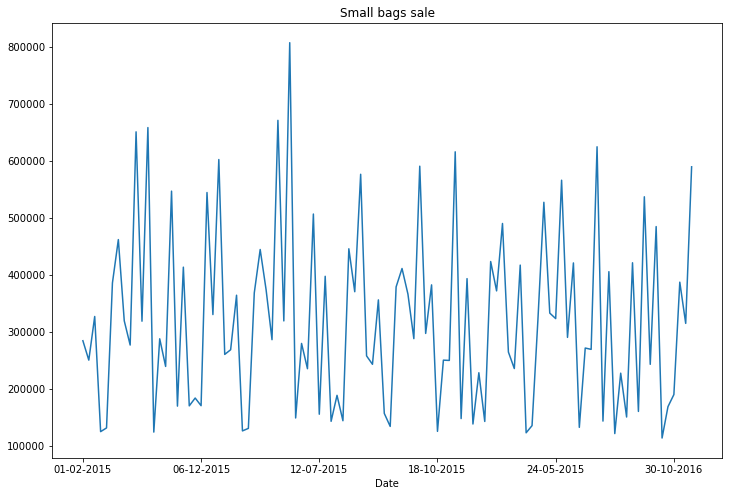

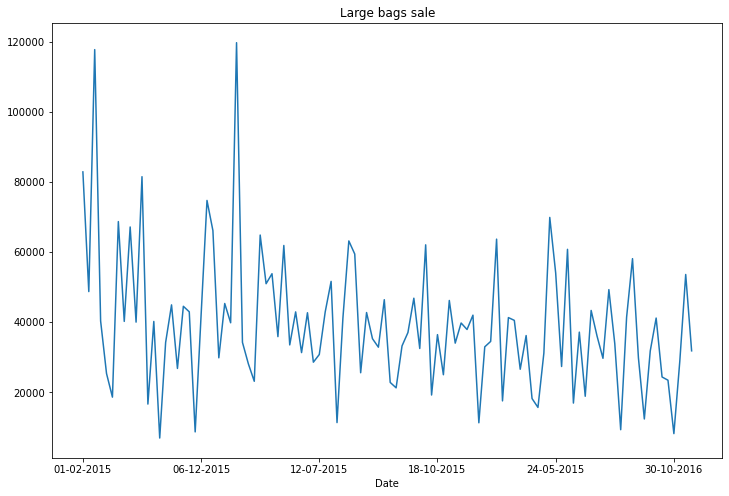

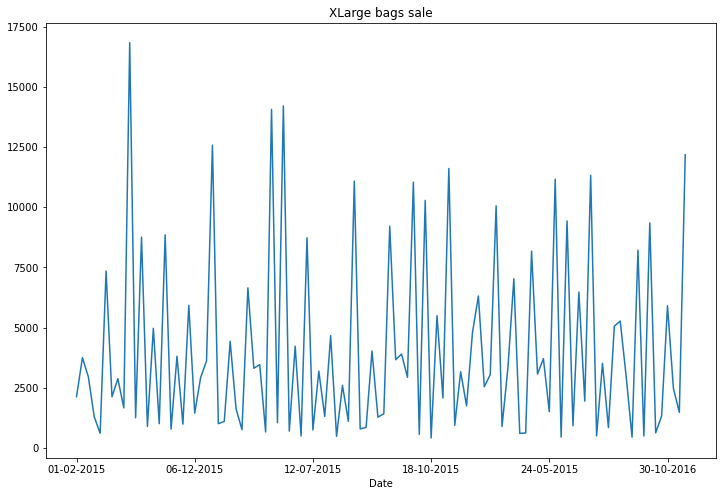

In [23]:
a=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
a['Small Bags'].plot()
plt.title('Small bags sale')

b=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
b['Large Bags'].plot()
plt.title('Large bags sale')


c=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
c['XLarge Bags'].plot()
plt.title('XLarge bags sale')


>As we see that the sale of small bags is highest between 12-june-2015 to 06-dec-2015

>the sale of large bags is highest in feburary month and somewhere in november month.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

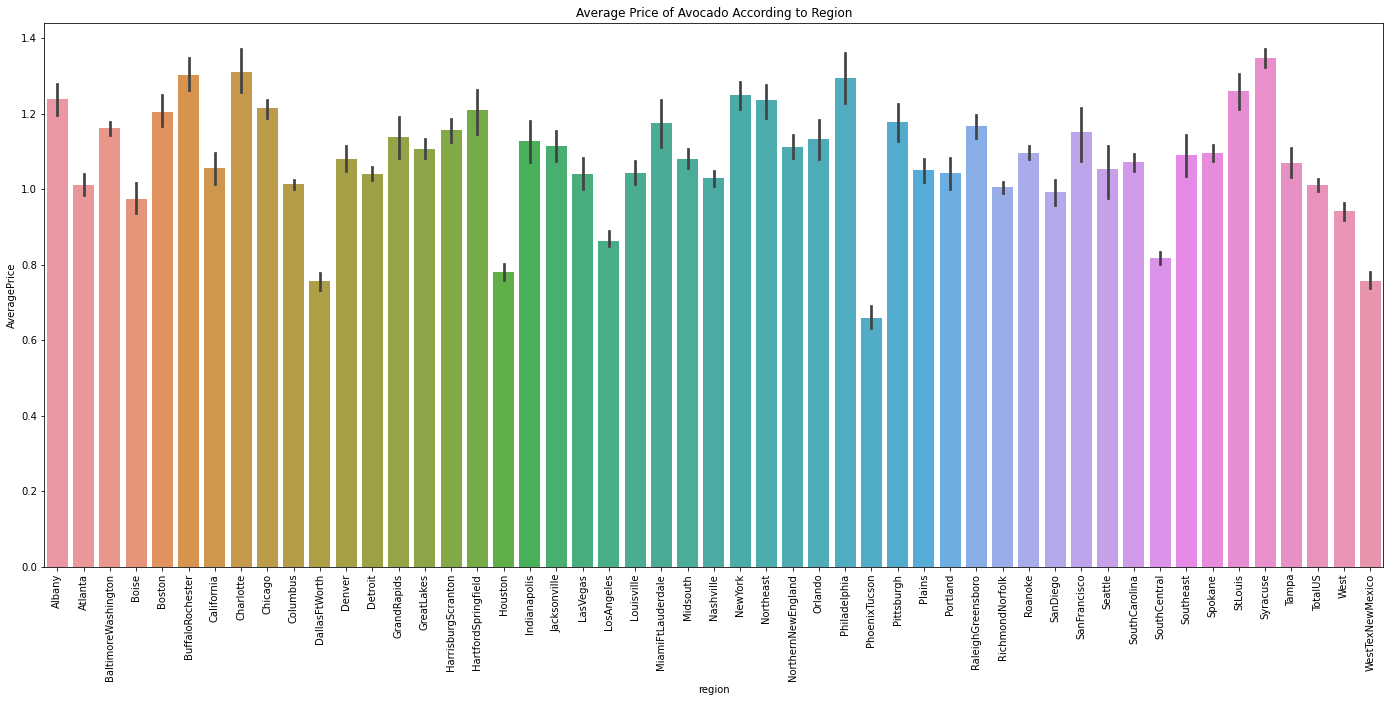

In [24]:
plt.figure(figsize=(24,10))
sns.barplot(x='region',y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.title('Average Price of Avocado According to Region')

>As we see through the above graph that the 'average price' of avacado is highest in 'Syracuse' region

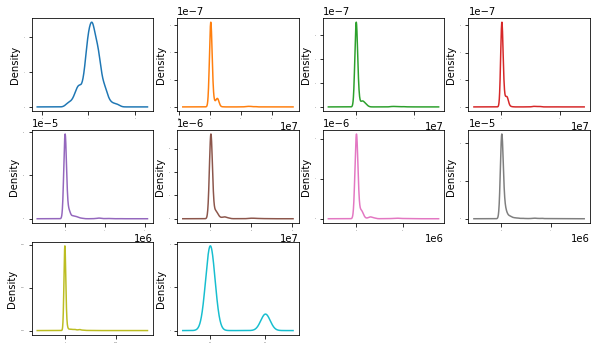

In [25]:
df.plot(kind='density',subplots=True,  layout=(6,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

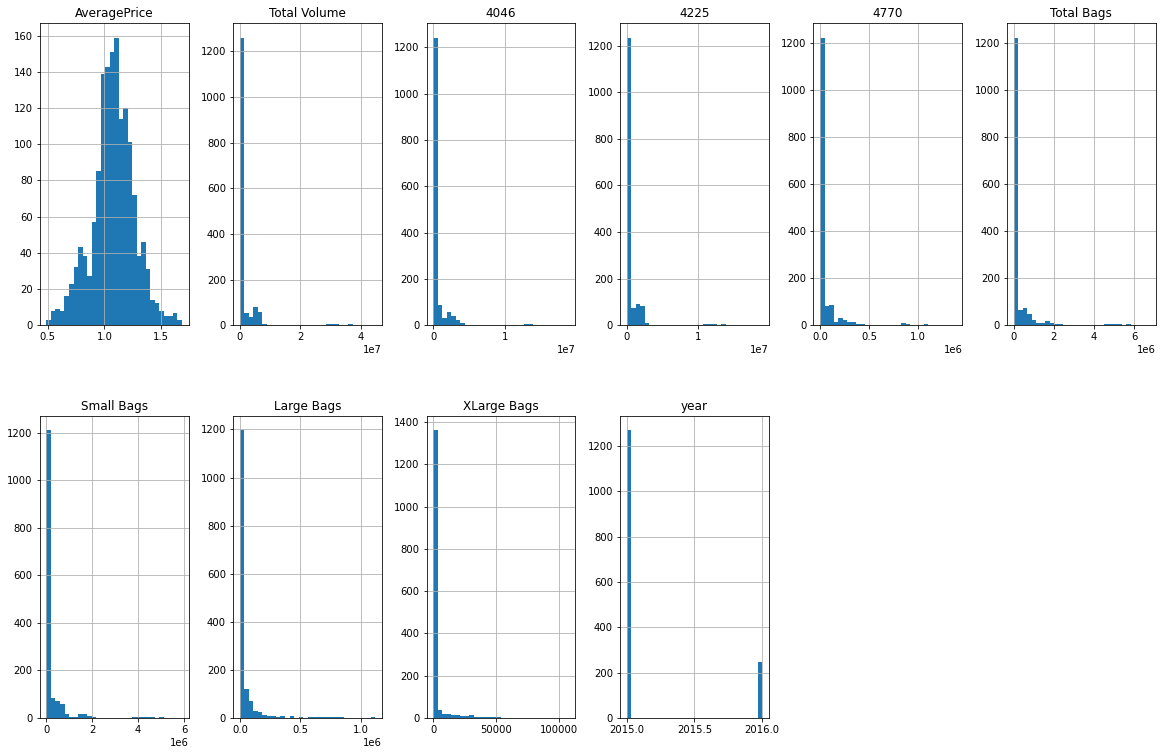

In [26]:
# Histogram to see the data distribution of all the columns
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

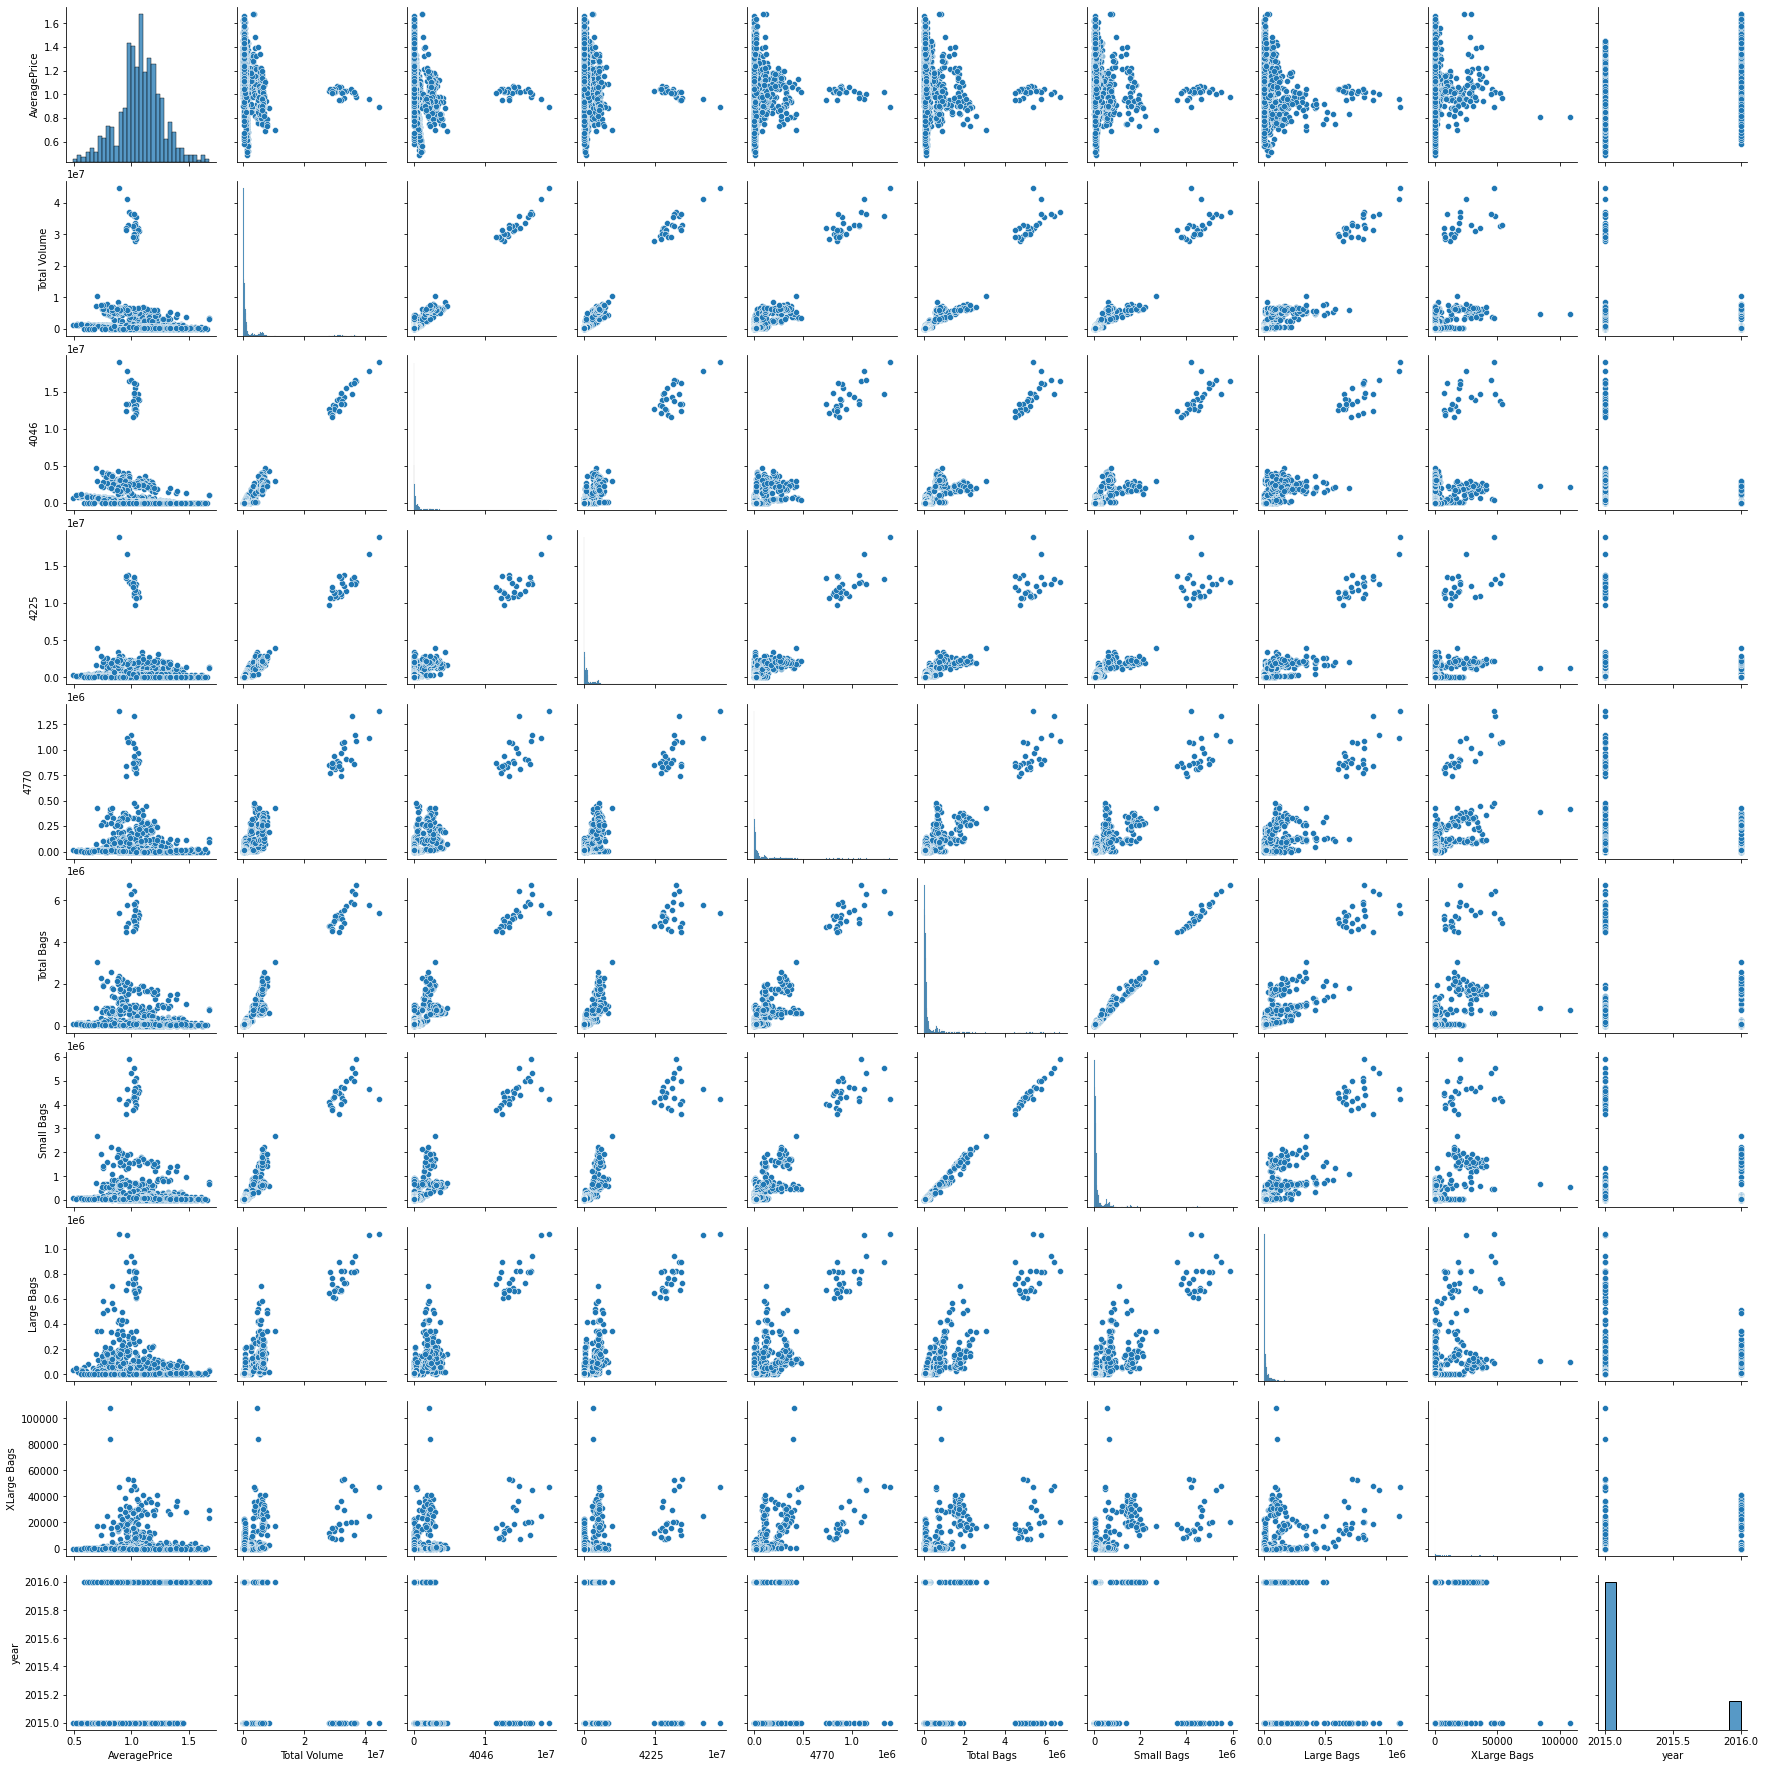

In [27]:
sns.pairplot(df)

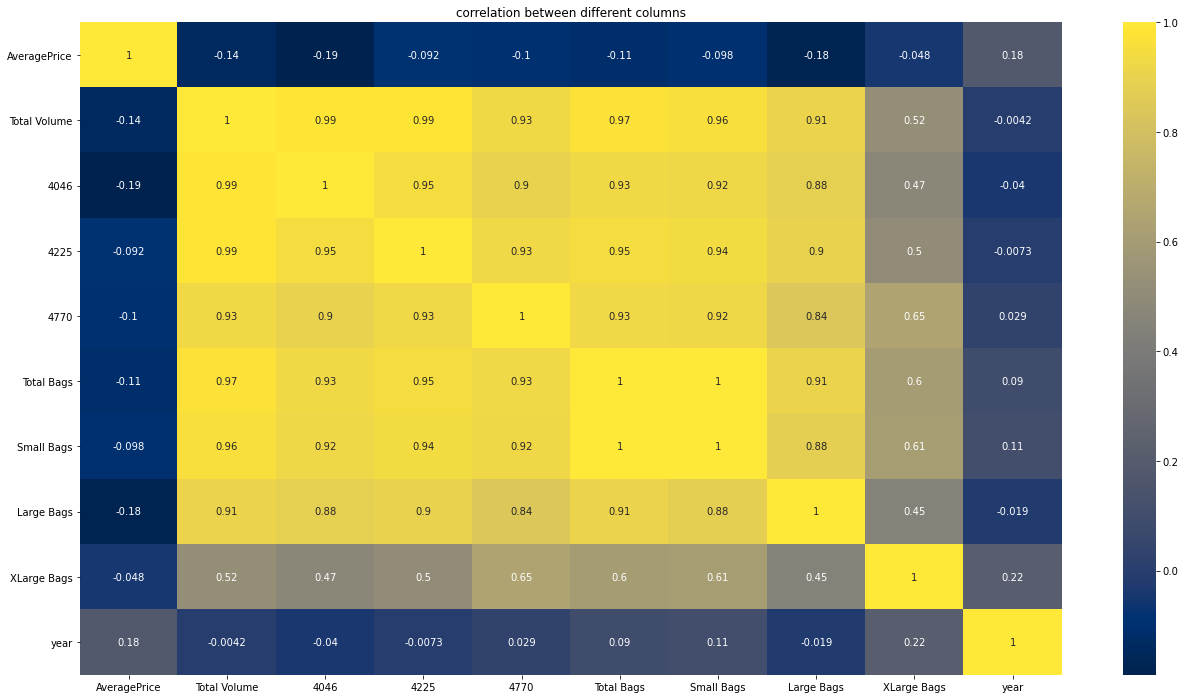

In [28]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

>As we see through the above correlational matrix that all te columns are almost equally correlated to the average price column.

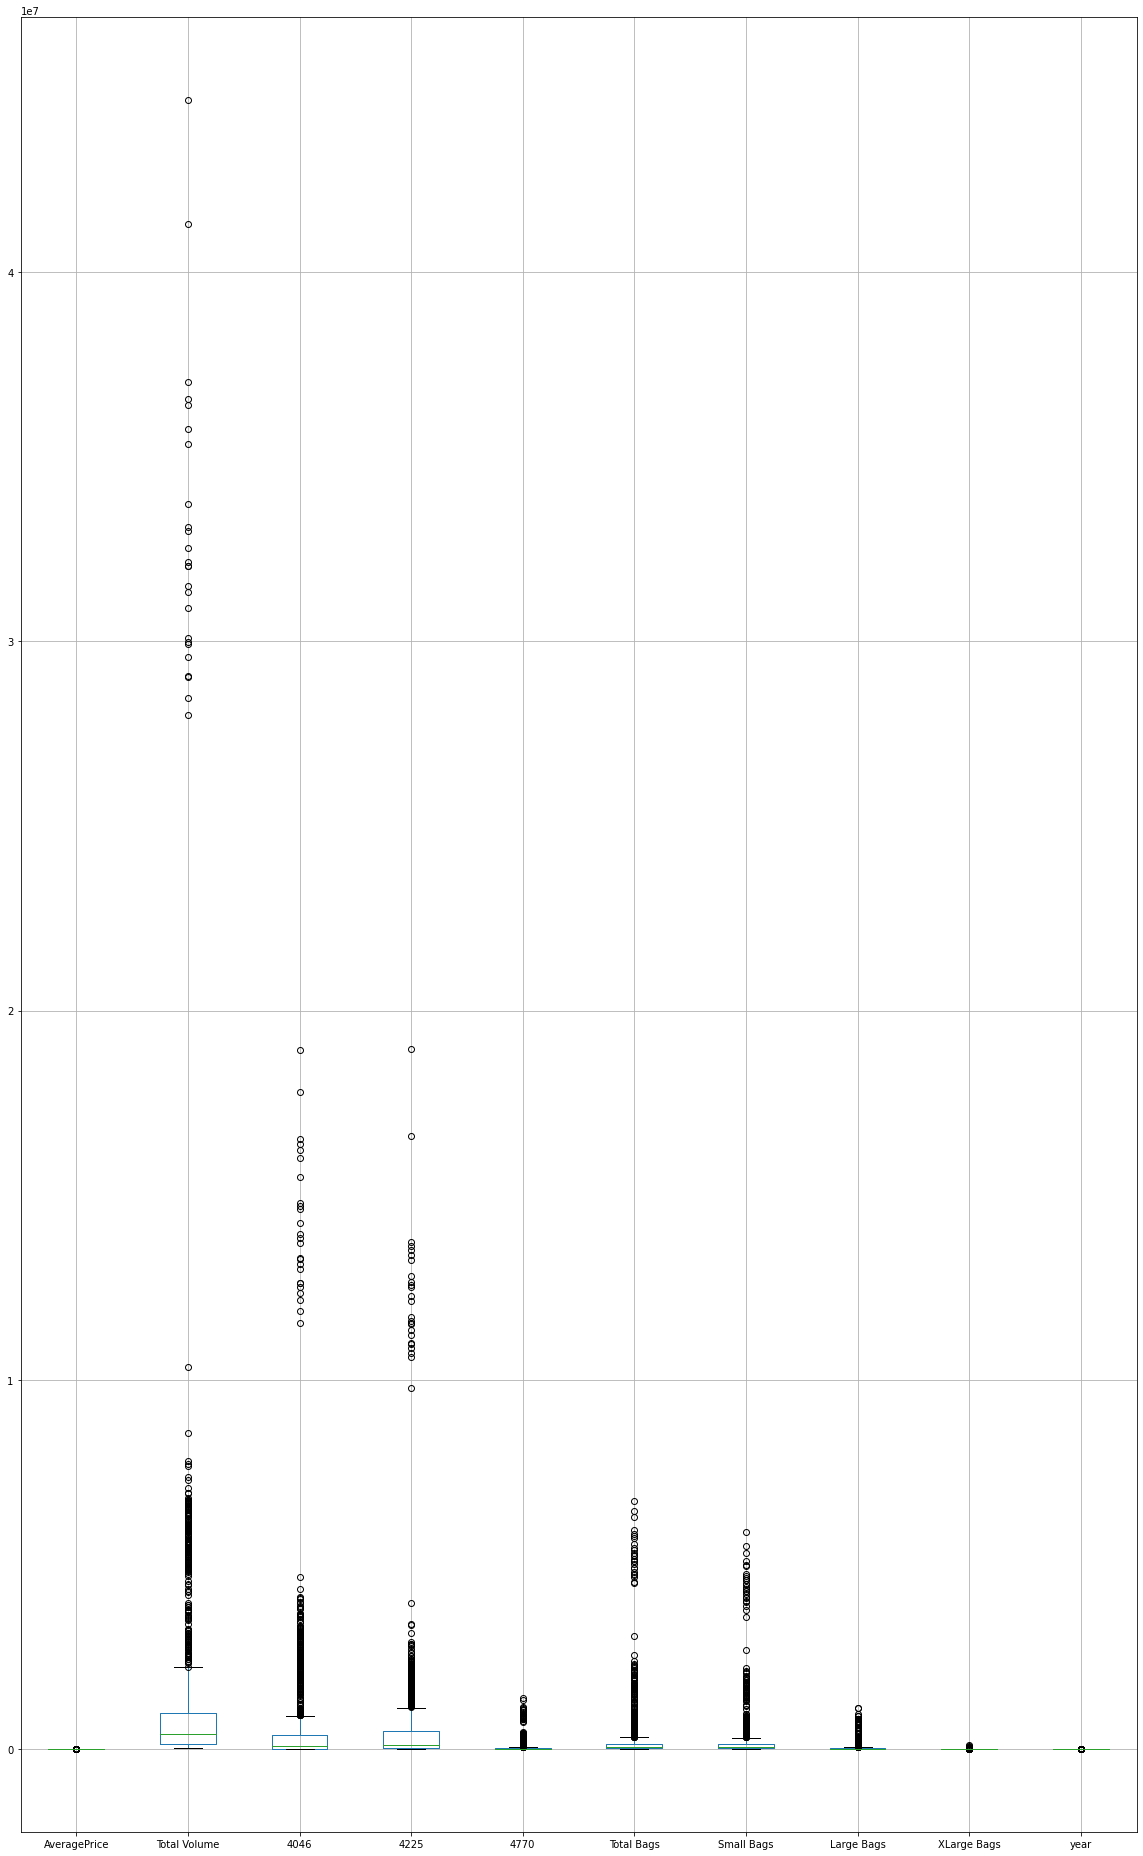

In [29]:
#checking the outliers
df.iloc[:,0:14].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

>As we  see from the above plot that their are outliers present in almost every colum in the dataset.

>Before Removing the outliers we have to encode our dataset as it contains some object column.

In [30]:
#encoding the dataset
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,53.0,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0.0,2016,7.0
1513,29.0,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0.0,2016,7.0
1514,5.0,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0.0,2016,7.0
1515,83.0,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0.0,2016,7.0


>As we see before that type column have only one category that is conventional. So we can remove the column.

>We can remove the date column also as it will not help us in predicting the average price because date can never be the same everytime.

In [32]:
df=df.drop(['type','Date'], axis=1)

In [33]:
#checking the zscore of the dataset to remove the outliers
z=np.abs(zscore(df))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 2.26753179,
        0.88028586],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 2.26753179,
        0.88028586],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 2.26753179,
        0.88028586]])

In [34]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [35]:
df_new=df[(z<3).all(axis=1)]  # removing outliers

In [36]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7.0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7.0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7.0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7.0


In [37]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

>As we see their are skewness present in the columns, so we have to remove that skewness. But we cannot remove skewness from 'year' and 'region' columns as both are categorical columns.

In [38]:
skew=('Total Volume','AveragePrice','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for i in skew:
    if df_new.skew().loc[i]>0.5:
        df_new[i]=np.log1p(df_new[i])

In [39]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
dtype: float64

>As we see the skewness is removed from all the columns.

### Model Building

In [40]:
#splitting the dataset into independent and target variables in x and y respectively

x=df_new.drop('AveragePrice', axis=1)
y=df_new['AveragePrice']

In [41]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,2015,0.0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,2015,0.0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,2015,0.0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,2015,0.0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,2015,0.0
...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,2016,7.0
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,2016,7.0
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,2016,7.0
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,2016,7.0


In [42]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [43]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.3836483123703044
At random state 0, the testing accuracy is:- 0.411550709077256


At random state 1, the training accuracy is:- 0.4036347471342602
At random state 1, the testing accuracy is:- 0.37695261484254683


At random state 2, the training accuracy is:- 0.395410013383628
At random state 2, the testing accuracy is:- 0.4016894378387462


At random state 3, the training accuracy is:- 0.4061383720181604
At random state 3, the testing accuracy is:- 0.3668171143768306


At random state 4, the training accuracy is:- 0.4086535820019064
At random state 4, the testing accuracy is:- 0.36309162798940764


At random state 5, the training accuracy is:- 0.3785000411259155
At random state 5, the testing accuracy is:- 0.4312188565225351


At random state 6, the training accuracy is:- 0.3915956466428372
At random state 6, the testing accuracy is:- 0.3931872068916169


At random state 7, the training accuracy is:- 0.4078656793393042
At random state 7,

At random state 123, the training accuracy is:- 0.3847345244710284
At random state 123, the testing accuracy is:- 0.4231001788930069


At random state 124, the training accuracy is:- 0.4030167041081334
At random state 124, the testing accuracy is:- 0.38326268548868636


At random state 125, the training accuracy is:- 0.4146372339650505
At random state 125, the testing accuracy is:- 0.35103827664866194


At random state 126, the training accuracy is:- 0.4023065777636444
At random state 126, the testing accuracy is:- 0.35729280577808187


At random state 127, the training accuracy is:- 0.4070553153292781
At random state 127, the testing accuracy is:- 0.373506589245712


At random state 128, the training accuracy is:- 0.4117702402249027
At random state 128, the testing accuracy is:- 0.35951341879382714


At random state 129, the training accuracy is:- 0.3974914501308936
At random state 129, the testing accuracy is:- 0.39203022396916154


At random state 130, the training accuracy is:- 0.4

At random state 184, the training accuracy is:- 0.4007817310789068
At random state 184, the testing accuracy is:- 0.38450786033551865


At random state 185, the training accuracy is:- 0.40527200161287547
At random state 185, the testing accuracy is:- 0.3723845812508162


At random state 186, the training accuracy is:- 0.3857975823371824
At random state 186, the testing accuracy is:- 0.42431243412895625


At random state 187, the training accuracy is:- 0.4030624744744281
At random state 187, the testing accuracy is:- 0.3814666951959501


At random state 188, the training accuracy is:- 0.404345310993384
At random state 188, the testing accuracy is:- 0.38194389327235456


At random state 189, the training accuracy is:- 0.395725641930743
At random state 189, the testing accuracy is:- 0.40051122398723293


At random state 190, the training accuracy is:- 0.42855812927724224
At random state 190, the testing accuracy is:- 0.29823907672102945


At random state 191, the training accuracy is:- 0.

>From the above stats we can see that at random state 57, the testing accuracy and the training accuracy is highest.

>Now testing the best random state in different algorithms.

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=57)

In [45]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(),KernelRidge()]

In [46]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2_score of',n,'is')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2_score of LinearRegression() is
0.4536695263541727
0.0188872168884909
0.11077288603501506


r2_score of SVR() is
0.03357081556260266
0.03341046947651976
0.14181207501643237


r2_score of RandomForestRegressor() is
0.7663845551969521
0.00807633069605569
0.06712320185614849


r2_score of DecisionTreeRegressor() is
0.5490305253586121
0.015590487238979118
0.08392111368909513


r2_score of KernelRidge() is
0.45203835106767043
0.018943608327199636
0.11119839144573523




>Now checking the Cross Validation Score to check whether our models are overfitted or underfitted

In [47]:
scrli=cross_val_score(LinearRegression(),x,y,cv=3)
print('cross validation score of linear regression: ',scrli.mean())

cross validation score of linear regression:  0.1160812285023175


In [48]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=3)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.15840175077435883


In [49]:
scrkr=cross_val_score(KernelRidge(),x,y,cv=5)
print('cross validation score of KrenelRidgeRegressor: ',scrkr.mean())

cross validation score of KrenelRidgeRegressor:  0.06262036367730972


In [50]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=3)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  -1.0984800187338377


>Minimum difference in r2_score and cross validation score is for RandomForest Rgressor. So it is our best model

>Doing GridSearchCV for getting best parameters

In [51]:
#creating parameter list to pass in GridSearchCV
param_grid = { 'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],}

In [52]:
GCV=GridSearchCV(RandomForestRegressor(),param_grid,cv=7)

In [53]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [54]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 15}

In [55]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [56]:
r2_score(GCV_pred,y_test)

0.7152277767823503

In [57]:
joblib.dump(GCV.best_estimator_,'Avacado.obj')

['Avacado.obj']

>Case Study:

   >>The avocado, a tree likely originating from southcentral Mexico, is classified as a member of the flowering plant family Lauraceae. The fruit of the plant, also called an avocado, is botanically a large berry containing a single large seed.

   >>This data was downloaded from the Hass Avocado Board website in May of 2018.The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

   >>My task is to make a mode that can consider the data provided and predict the Average Price.

>Findings:

   >>there are no null values present in the dataset
   
   >>The average price of the avacado's are in a range of 0.4 to 1.8. The majority of the the price is from 1.0 to 1.2
   
   >>The sale of the avacado is varying very much. The maximum sale of the avacado is done somewhere in june.
   
   >>The sale of the '4046' type of avacado is highest in feburary and in august.
   
   >>The sale of '4225' type of avacado is high in february and after that it is decreasing.
   
   >>The sale of '4770' type of avacado is less in february but it increase suddenly in somewhere middle of the 2015 year and then it decreases.
   
   >> 'California' has the highest use of avacado and 'Los Angeles' has the least use of avacado.
   
   >>The sale of avacado in 2015 is little more then in 2016.
   
   >>The sale of small bags is highest between 12-june-2015 to 06-dec-2015. The sale of large bags is highest in feburary month and somewhere in november month.
   
   >>The 'average price' of avacado is highest in 'Syracuse' region
   
   >>All te columns are almost equally correlated to the average price column.
  
   
>Predictions:

   >>At random state 57, the testing accuracy and the training accuracy is highest.
   
   >>The best r2_score is for RandomForest Regressor.
   
   >>Minimum difference in r2_score and cross validation score is for RandomForest Rgressor. So it is our best model.
   
   >>After doing hyperparameter tuning. we increase the score of our model from 15% to 72%.